# Exercício 5 - Máquinas de Aprendizado Extremo - ELM

**Aluno:** Vítor Gabriel Reis Caitité

**Matrícula:** $2021712430$

## Objetivos

O objetivo dos exercícios desta semana é ter um primeiro contato com classificadores não lineares,
especificamente ELMs. A linguagem de programação utilizada foi Python. 

As bases de dados utilizadas nessa lista foram:

- mlbench.2dnormals(200)

- mlbench.xor(100)

- mlbench.circle(100)

- mlbench.spirals(100,sd = 0.05)

Para cada uma das bases, serão construídas diferentes ELMs variando-se o número de neurônios, por exemplo p = 5, 10, 30. Como as bases de dados são bidimensionais, é possível visualizar a superfície de separação obtida para cada uma das ELMs, que será mostrada nesse relatório. Como requisitado na descrição da lista, a avaliação da qualidade
dos resultados será exclusivamente visual.

## Importando Bibliotecas e Datasets

In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
normals_dataset = pd.read_csv('data/normals.csv')
xor_dataset = pd.read_csv('data/xor.csv')
circle_dataset = pd.read_csv('data/circle.csv')
spirals_dataset = pd.read_csv('data/spirals.csv')

## Implementação da ELM

In [3]:
import random
class ELM:
         
    def __init__(self, n_neurons):
        self.n_neurons = n_neurons
    
    def fit(self, X, y):
        # Adding polarization term 
        X_new = np.ones((X.shape[0], X.shape[1]+1))
        X_new[:,1:] = X
        n = X_new.shape[1]
        self.Z = np.array([random.uniform(-0.5, 0.5) for i in range(n*self.n_neurons)]).reshape(n, self.n_neurons)
        H = np.tanh(np.dot(X_new, self.Z))
        H_new = np.ones((H.shape[0], H.shape[1]+1))
        H_new[:,1:] = H
        self.w = np.dot(np.linalg.pinv(H_new), y)           
        return self.w, H, self.Z
            
    def predict(self, X):
        X_new = np.ones((X.shape[0], X.shape[1]+1))
        X_new[:,1:] = X
        H = np.tanh(np.dot(X_new, self.Z))
        H_new = np.ones((H.shape[0], H.shape[1]+1))
        H_new[:,1:] = H
        y_predicted = np.sign(np.dot(H_new, self.w))
        y_predicted[y_predicted==0]=1
        return y_predicted


## Funções para captação de resultados e geração de gráficos

In [4]:
def plot_decision_border(X, y, clf, fig):
    #fig = plt.figure()
    ax = fig.add_subplot(121)
    # decision surface for logistic regression on a binary classification dataset
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    #grid = normalizer.transform(grid)
    # make predictions for the grid
    yhat=(clf.predict(grid))
    yhat=np.array(yhat)
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in [-1, 1]:
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
    # show the plot
    #plt.show()  

In [5]:
def plot_surface(X, clf, fig):
    #fig = plt.figure()
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    ax = fig.add_subplot(122, projection='3d')
    # create grid to evaluate model
    x = np.linspace(min1, max1, 30)
    y = np.linspace(min2, max2, 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    print(xy.shape)
    #xy = normalizer.transform(xy)
    Z=clf.predict(xy)
    Z=np.array(Z).reshape(X.shape)
    # plot decision boundary and margins
    figure= ax.plot_surface(X, Y, Z,rstride=1, cstride=1, cmap='RdBu',edgecolor='none')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    cbar = fig.colorbar(figure, ax=ax, extend='both')
    cbar.minorticks_on()
    plt.show()

In [6]:
def results(X, y, p):
    train_accuracy_ELM = 0
    clf = ELM(p)
    clf.fit(X, y)
    y_hat_train=clf.predict(X)
    train_accuracy_ELM = accuracy_score(y, y_hat_train)   
    
    print(f"*********** Resultado ELM com {p} neurônios na camada escondida **************")
    print("Acc train: " + '{:.4f}'.format(train_accuracy_ELM.mean())+ "+/-" + '{:.4f}'.format(train_accuracy_ELM.std()))
    fig = plt.figure(figsize=(11,5))
    plot_decision_border(X, y, clf, fig)
    plot_surface(X, clf, fig)
    

## Aplicação na base de dados mlbench.2dnormals(200)

*********** Resultado ELM com 5 neurônios na camada escondida **************
Acc train: 0.9300+/-0.0000
(900, 2)


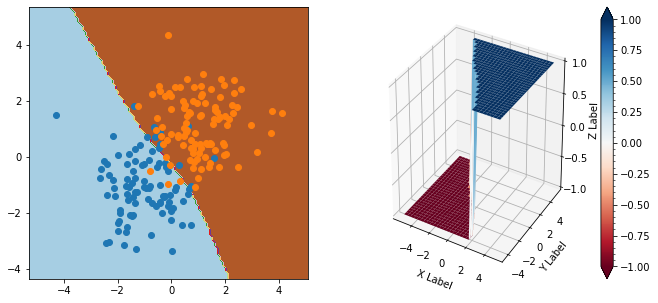

*********** Resultado ELM com 10 neurônios na camada escondida **************
Acc train: 0.9400+/-0.0000
(900, 2)


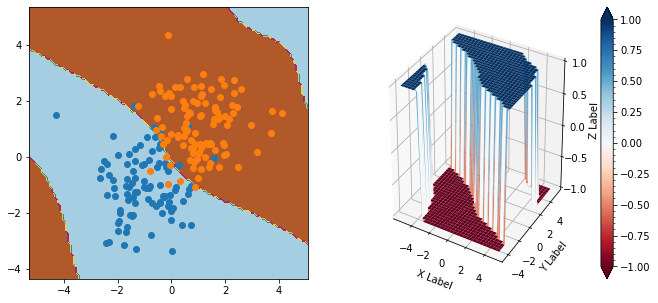

*********** Resultado ELM com 30 neurônios na camada escondida **************
Acc train: 0.9450+/-0.0000
(900, 2)


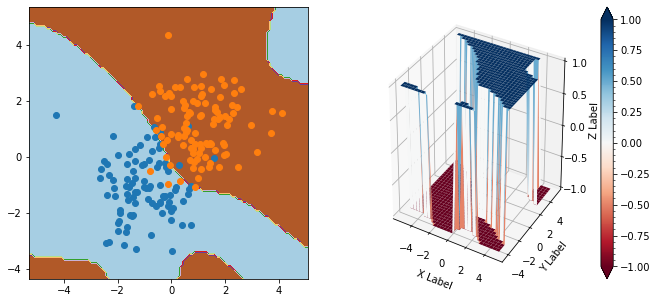

In [7]:
y = normals_dataset["classes"].astype(int).to_numpy()
y[y==2] = -1
X = normals_dataset.iloc[:,0:2].astype(float).to_numpy()
for p in [5, 10, 30]:
    results(X, y, p)
    

## Aplicação na base de dados mlbench.xor(100)

*********** Resultado ELM com 5 neurônios na camada escondida **************
Acc train: 0.9400+/-0.0000
(900, 2)


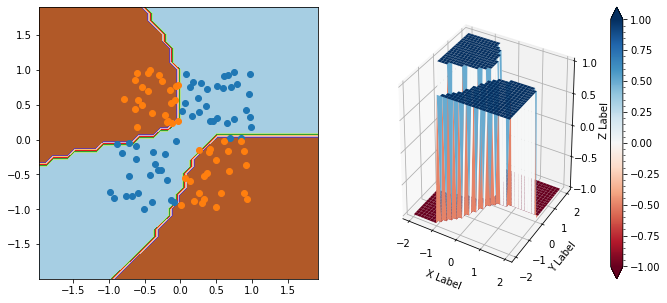

*********** Resultado ELM com 10 neurônios na camada escondida **************
Acc train: 0.9400+/-0.0000
(900, 2)


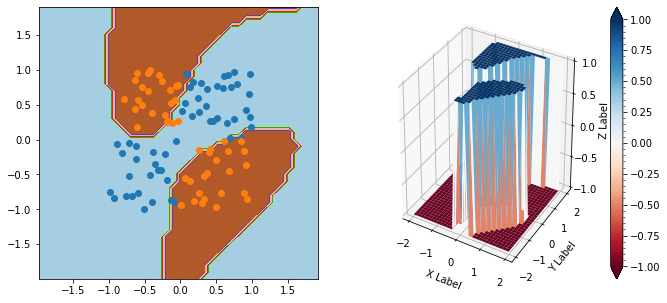

*********** Resultado ELM com 30 neurônios na camada escondida **************
Acc train: 1.0000+/-0.0000
(900, 2)


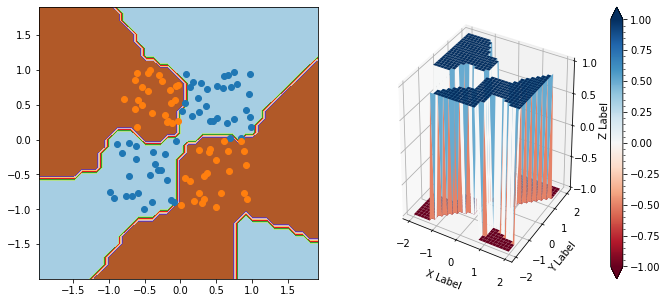

In [8]:
y = xor_dataset["classes"].astype(int).to_numpy()
y[y==2] = -1
X = xor_dataset.iloc[:,0:2].astype(float).to_numpy()
for p in [5, 10, 30]:
    results(X, y, p)

## Aplicação na base de dados mlbench.circle(100)

*********** Resultado ELM com 5 neurônios na camada escondida **************
Acc train: 0.8175+/-0.0000
(900, 2)


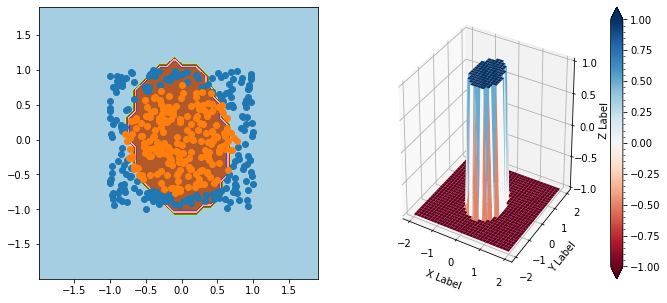

*********** Resultado ELM com 10 neurônios na camada escondida **************
Acc train: 0.9625+/-0.0000
(900, 2)


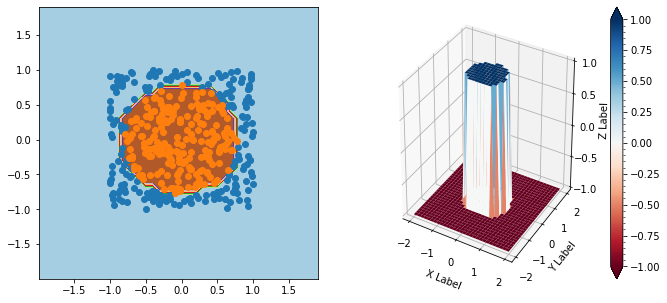

*********** Resultado ELM com 30 neurônios na camada escondida **************
Acc train: 0.9825+/-0.0000
(900, 2)


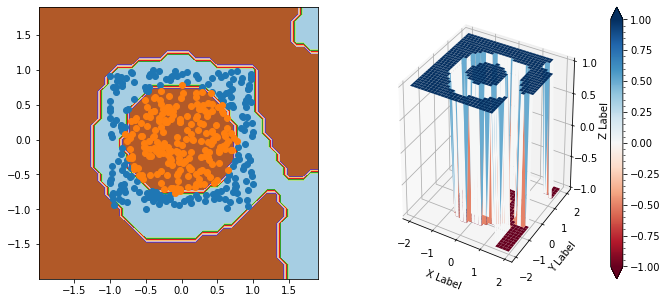

In [9]:
y = circle_dataset["classes"].astype(int).to_numpy()
y[y==2] = -1
X = circle_dataset.iloc[:,0:2].astype(float).to_numpy()
for p in [5, 10, 30]:
    results(X, y, p)

## Aplicação na base de dados mlbench.spirals(100)

*********** Resultado ELM com 5 neurônios na camada escondida **************
Acc train: 0.5000+/-0.0000
(900, 2)


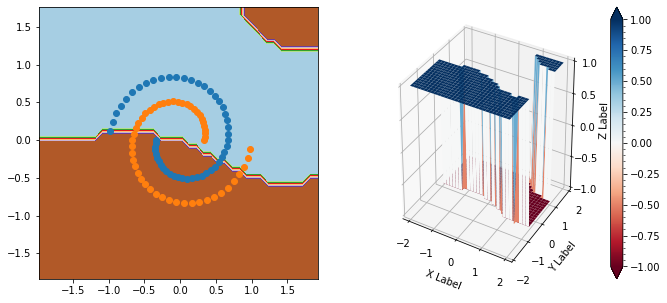

*********** Resultado ELM com 10 neurônios na camada escondida **************
Acc train: 0.9600+/-0.0000
(900, 2)


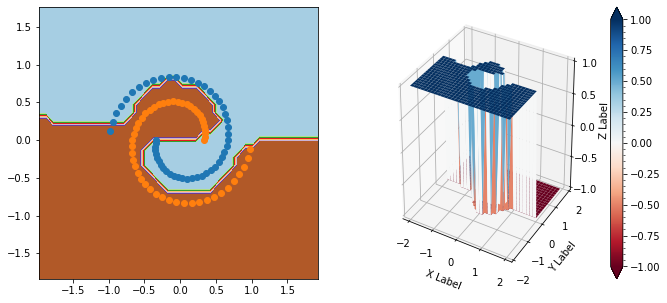

*********** Resultado ELM com 30 neurônios na camada escondida **************
Acc train: 1.0000+/-0.0000
(900, 2)


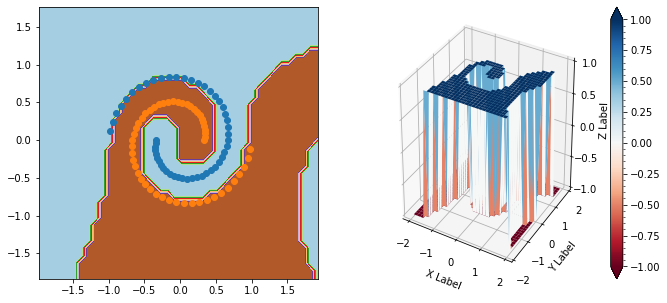

In [10]:
y = spirals_dataset["classes"].astype(int).to_numpy()
y[y==2] = -1
X = spirals_dataset.iloc[:,0:2].astype(float).to_numpy()
for p in [5, 10, 30]:
    results(X, y, p)

## Discussão:

Com esse trabalho foi possível colocar em prática conceitos relativos a Máquinas de Aprendizado Extremo (ELM).

Nesse tipo de modelo é feita a escolha de uma matriz de pesos Z aleatória que, através do aumento de dimensão no espaço da camada intermediária, busca garantir a separação linear nesse espaço. Resumidamente, o intuito da ELM é que o número de funções $g_i (\textbf{x}, \textbf{z}_i)$ seja suficientemente grande para garantir a separabilidade no espaço da camada intermediária. Após isso, uma solução direta de erro mínimo pode ser obtida.

Como descrito em [1], a ELM possui um método de aprendizado simples, descrito a seguir.

Dado um \textit{dataset} de treinamento com N amostras $\{(\textbf{x}_i, \textbf{y}_i) \backslash \textbf{x}_i \in \textbf{R}^n, \textbf{y}_i \in \textbf{R}^m, i = 1,...,N\} $ , uma função de ativação $g(x)$ e um número de neurônios da camada escondida Ñ:

- Gerar uma matriz de pesos de entrada Z tal que $ Z \in R^{n x Ñ} $.

- Calcular a matriz de mapeamento H (saída da camada escondida), tal que $ H = g(\textbf{XZ}) $.

- Calcular os pesos da camada de saída, $ \textbf{W} = \textbf{H}^+\textbf{Y} $, sendo $\textbf{H}^+$ a pseudo-inversa de $\textbf{H}$.

Com as aplicações realizadas pôde-se perceber a eficiência do método em resolver problemas como os desta lista.
Pôde-se notar que com o aumento do número de neurônios a acurácia de treinamento melhorou, contudo em algumas superfícies onde p=30 já era possível perceber sinais de *overfitting* (isso pôde ser visto principalmente nas bases *2dnormals, xor* e *circle*). Além disso, para p = 5, o modelo gerado apresentou sinais de *underfitting* principalmente ao ser aplicado nas bases *circle* e *spirals*, visto que a superfície de separação não conseguiu se adequar aos dados.

## Referências

[1] G.-B. Huang, Q.-Y. Zhu, and C.-K. Siew, “Extreme learning machine: theory and applications,” Neurocomputing, vol. 70, no. 1-3, pp. 489–501, 2006.